In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('mobile_price.csv')

In [5]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   
)
print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (1600, 20)  Test size: (400, 20)


In [8]:
rf_clf = RandomForestClassifier(
    n_estimators=200,   
    max_depth=None,    
    random_state=42,
    oob_score=True,     
    n_jobs=-1           
)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [9]:
y_pred = rf_clf.predict(X_test)

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("Accuracy en train:", accuracy_score(y_train, rf_clf.predict(X_train)))
print("OOB score:", rf_clf.oob_score_)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy en test: 0.8775
Accuracy en train: 1.0
OOB score: 0.871875

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.84      0.82       100
           2       0.82      0.79      0.81       100
           3       0.94      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



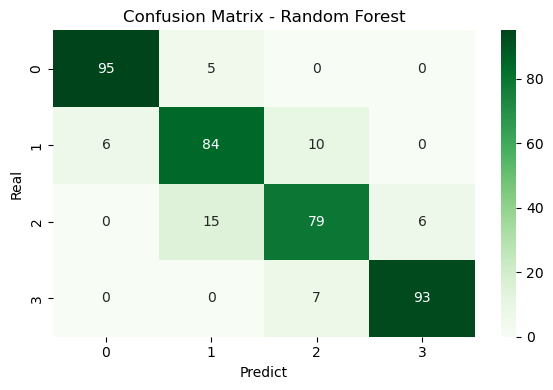

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predict")
plt.ylabel("Real")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


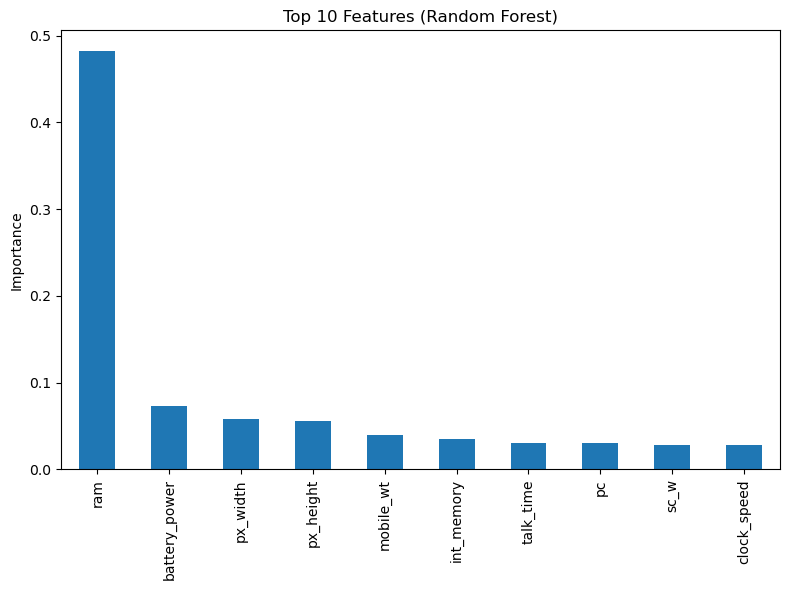

ram              0.482150
battery_power    0.072995
px_width         0.057680
px_height        0.055685
mobile_wt        0.038974
int_memory       0.035108
talk_time        0.030347
pc               0.029879
sc_w             0.028092
clock_speed      0.027861
sc_h             0.027539
fc               0.025965
m_dep            0.025229
n_cores          0.023432
four_g           0.007023
blue             0.006968
touch_screen     0.006929
dual_sim         0.006861
wifi             0.006445
three_g          0.004840
dtype: float64

In [15]:
importances = rf_clf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Features (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

feat_imp.head(20)